In [ ]:
!pip -q install gdown

In [1]:
import gdown

url = "https://zenodo.org/records/11045944/files/WASP_LW_SENT2_MED_L1C_B_201506_202109_10m_6y_NRT_v1.0.nc?download=1"
gdown.download(url, "data.nc")

Downloading...
From: https://zenodo.org/records/11045944/files/WASP_LW_SENT2_MED_L1C_B_201506_202109_10m_6y_NRT_v1.0.nc?download=1
To: /content/data.nc
100%|██████████| 2.06G/2.06G [03:43<00:00, 9.23MB/s]


'data.nc'

In [2]:
!ls

data.cn  data.nc  sample_data


In [ ]:
import xarray as xr

dataset = xr.open_dataset("data.nc")

In [4]:
list(dataset.variables.keys())

['s2_product',
 'dec_time',
 'x_centroid',
 'y_centroid',
 'lat_centroid',
 'lon_centroid',
 'n_pixels_fil',
 'limits',
 'pixel_x',
 'pixel_y',
 'pixel_spec']

In [5]:
print(dataset["n_pixels_fil"])

<xarray.DataArray 'n_pixels_fil' (n_filaments: 14374)> Size: 115kB
[14374 values with dtype=float64]
Dimensions without coordinates: n_filaments
Attributes:
    long_name:    Number of pixels in filament
    units:        none
    description:  Number of detected pixels composing the filament.


In [12]:
import xarray as xr

key = 'n_filaments'
ds = xr.open_dataset("data.nc", chunks={key: 10})

In [13]:
print("Dimensions:", ds.dims)
print("Sizes:", ds.sizes)

Dimensions: FrozenMappingWarningOnValuesAccess({'n_filaments': 14374, 'box_dims': 4, 'n_max_pixels_fil': 2563, 'n_bands': 13})
Sizes: Frozen({'n_filaments': 14374, 'box_dims': 4, 'n_max_pixels_fil': 2563, 'n_bands': 13})


In [ ]:
chunk_size = 10
n_time = ds.dims[key]

start = 0
# for start in range(0, n_time, chunk_size):
ds_chunk = ds.isel(n_filaments=slice(start, start + chunk_size))

df_chunk = ds_chunk.to_dataframe().reset_index()

In [16]:
df_chunk.head()

,n_filaments,box_dims,n_max_pixels_fil,n_bands,s2_product,dec_time,x_centroid,y_centroid,lat_centroid,lon_centroid,n_pixels_fil,limits,pixel_x,pixel_y,pixel_spec
0,0,0,0,0,b'S2A_MSIL1C_20160217T111122_N0201_R137_T29SQA...,2016.129696,2243.0,2468.0,36.818265,-6.48822,45.0,2230.0,2170.0,2626.0,0.1443
1,0,0,0,1,b'S2A_MSIL1C_20160217T111122_N0201_R137_T29SQA...,2016.129696,2243.0,2468.0,36.818265,-6.48822,45.0,2230.0,2170.0,2626.0,0.1230
2,0,0,0,2,b'S2A_MSIL1C_20160217T111122_N0201_R137_T29SQA...,2016.129696,2243.0,2468.0,36.818265,-6.48822,45.0,2230.0,2170.0,2626.0,0.0918
3,0,0,0,3,b'S2A_MSIL1C_20160217T111122_N0201_R137_T29SQA...,2016.129696,2243.0,2468.0,36.818265,-6.48822,45.0,2230.0,2170.0,2626.0,0.0441
4,0,0,0,4,b'S2A_MSIL1C_20160217T111122_N0201_R137_T29SQA...,2016.129696,2243.0,2468.0,36.818265,-6.48822,45.0,2230.0,2170.0,2626.0,0.0318


In [40]:
len((df_chunk["lat_centroid"] + df_chunk["lon_centroid"]).unique())

10

In [23]:
df_chunk.loc[1]

,1
n_filaments,0
box_dims,0
n_max_pixels_fil,0
n_bands,1
s2_product,b'S2A_MSIL1C_20160217T111122_N0201_R137_T29SQA...
dec_time,2016.129696
x_centroid,2243.0
y_centroid,2468.0
lat_centroid,36.818265
lon_centroid,-6.48822


In [36]:
len(df_chunk[df_chunk["n_filaments"]==8])/13, len(df_chunk['n_bands'].unique())

(40.046875, 13)

In [39]:
df_chunk.columns

Index(['n_filaments', 'box_dims', 'n_max_pixels_fil', 'n_bands', 's2_product',
       'dec_time', 'x_centroid', 'y_centroid', 'lat_centroid', 'lon_centroid',
       'n_pixels_fil', 'limits', 'pixel_x', 'pixel_y', 'pixel_spec'],
      dtype='object')

In [42]:
f1 = df_chunk[df_chunk["n_filaments"] == 0]

In [47]:
print(len(f1))
for col in f1.columns:
    print(f"{col}: {len(f1[col].unique())}")


133276
n_filaments: 1
box_dims: 4
n_max_pixels_fil: 2563
n_bands: 13
s2_product: 1
dec_time: 1
x_centroid: 1
y_centroid: 1
lat_centroid: 1
lon_centroid: 1
n_pixels_fil: 1
limits: 4
pixel_x: 36
pixel_y: 44
pixel_spec: 322


In [60]:
# len((f1["pixel_x"].astype(str)+"a"+f1["pixel_y"].astype(str)).unique())
# (f1["pixel_x"].astype(str)+"a"+f1["pixel_y"].astype(str)).unique()

f1["n_bands"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [87]:
# mask = np.zeros(())
import numpy as np
from tqdm import tqdm
h, w = int(2*f1.loc[0, "y_centroid"]), int(2*f1.loc[0, "x_centroid"])
mask = np.zeros((h, w))

min_x = min_y = 1e8
max_x = max_y = -1
for idx, row in tqdm(f1.iterrows()):
    if not np.isnan(row["pixel_x"]) and not np.isnan(row["pixel_y"]):
        # print(row["pixel_x"], row["pixel_y"])
        p_x, p_y = int(row["pixel_x"]), int(row["pixel_y"])
        if p_x < min_x:
            min_x = p_x
        if p_y < min_y:
            min_y = p_y

        if p_x > max_x:
            max_x = p_x
        if p_y > max_y:
            max_y = p_y
        mask[p_x, p_y] = 1

133276it [00:07, 17099.77it/s]


In [79]:
(mask==1).sum(), min_x, min_y, max_x, max_y

(np.int64(45), 2170, 2253, 2360, 2626)

In [85]:
center_mask = mask[min_x-1:max_x+1, min_y-1:max(min_y+200, max_y+1)]
mask.shape, center_mask.shape

((4936, 4486), (192, 375))

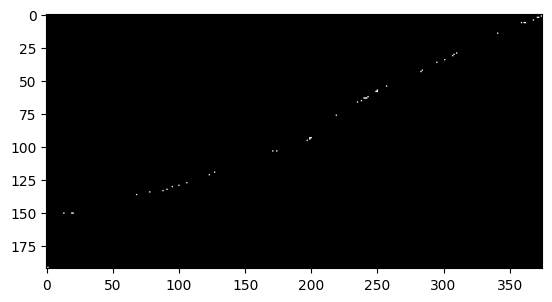

In [86]:
import matplotlib.pyplot as plt

plt.imshow(center_mask, cmap="gray")

In [50]:
a = 36*44*13
len(f1)/(a)

6.472222222222222

In [8]:
list(dataset.variables.keys())

['s2_product',
 'dec_time',
 'x_centroid',
 'y_centroid',
 'lat_centroid',
 'lon_centroid',
 'n_pixels_fil',
 'limits',
 'pixel_x',
 'pixel_y',
 'pixel_spec']